In [1]:
#import libraries
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import IPython
import IPython.display
import os

#set the figure size for all visualizations
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [16, 9]

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
#get jena-climate datasets. 
zip_path = tf.keras.utils.get_file(
    origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname = 'jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _  = os.path.splitext(zip_path)

In [3]:
#import data from 
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
#column names
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [5]:
#data sampling with 10 minutes intervals but we tryna predict hourly predictions, so let's start sub sampling to hourly sampling
df  = df[5::6]

#let's convert a column of a DataFrame from a string representation of datetime values to actual datetime objects in pandas.
date_time = pd.to_datetime(df.pop('Date Time'), format = '%d.%m.%Y %H:%M:%S')

In [6]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [7]:
date_time.head()

5    2009-01-01 01:00:00
11   2009-01-01 02:00:00
17   2009-01-01 03:00:00
23   2009-01-01 04:00:00
29   2009-01-01 05:00:00
Name: Date Time, dtype: datetime64[ns]

In [8]:
#minimum wind velocity must be 0 and so -9999 is likely erroneus
min_val = df['wv (m/s)'].min()
min_val

-9999.0

In [9]:
#let's change the minimum value of wind velocity(df['wv (m/s)'])
df[df['wv (m/s)'] == -9999] = 0

#same for the max wind velocity
df[df['max. wv (m/s)'] == -9999] = 0
df['max. wv (m/s)'].min()

0.0

In [10]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [11]:
df['wd (deg)'].min(), df['wd (deg)'].max()

(0.0, 360.0)

In [12]:
#wind velocity and wd degree is in degrees
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

#it would be easier for the model, if wind velocity and direction is in the vector, let's convert it
wd_dir = df.pop('wd (deg)') * np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_dir)
df['Wy'] = wv*np.sin(wd_dir)

#calculate the max wind x and y components
df['max_Wx'] = max_wv * np.cos(wd_dir)
df['max_Wy'] = max_wv * np.sin(wd_dir)

In [13]:
#date is gonna be very usefull. let's change it to the seconds
time_stamps = date_time.map(pd.Timestamp.timestamp)

In [14]:
#setting day and year
day = 24 * 60 * 60  #day in seconds
year = (365.25) * day  #year in seconds

#let's get sin and cos of day and year
df['day_sin'] = np.sin(time_stamps * (2 * np.pi / day))
df['day_cos'] = np.cos(time_stamps * (2 * np.pi / day))
df['year_sin'] = np.sin(time_stamps * (2 * np.pi / year))
df['year_cos'] = np.cos(time_stamps * (2 * np.pi / year))

In [15]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max_Wx,max_Wy,day_sin,day_cos,year_sin,year_cos
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.005017,0.999987
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.005734,0.999984
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.006451,0.999979
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603,-0.190000,-0.329090,0.866025,0.500000,0.007168,0.999974
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292,-0.810044,0.343843,0.965926,0.258819,0.007884,0.999969


# Split The Data (70 %, 20 %, 10 %)
1. First part of data must be Training Set
2. Second part of data must be Validation set 
3. Third part of data must be Test set

In [16]:
#get the lnegth of dataframe
len_df = len(df)

#70 % for the training
train_df = df[:int(round(0.7 * len_df,0))]

#20 % for the validation
val_df = df[int(round(0.7 * len_df,0)):int(round(0.9 * len_df,0))]

#10 % for the validation
test_df = df[int(round(0.9 * len_df,0)):]


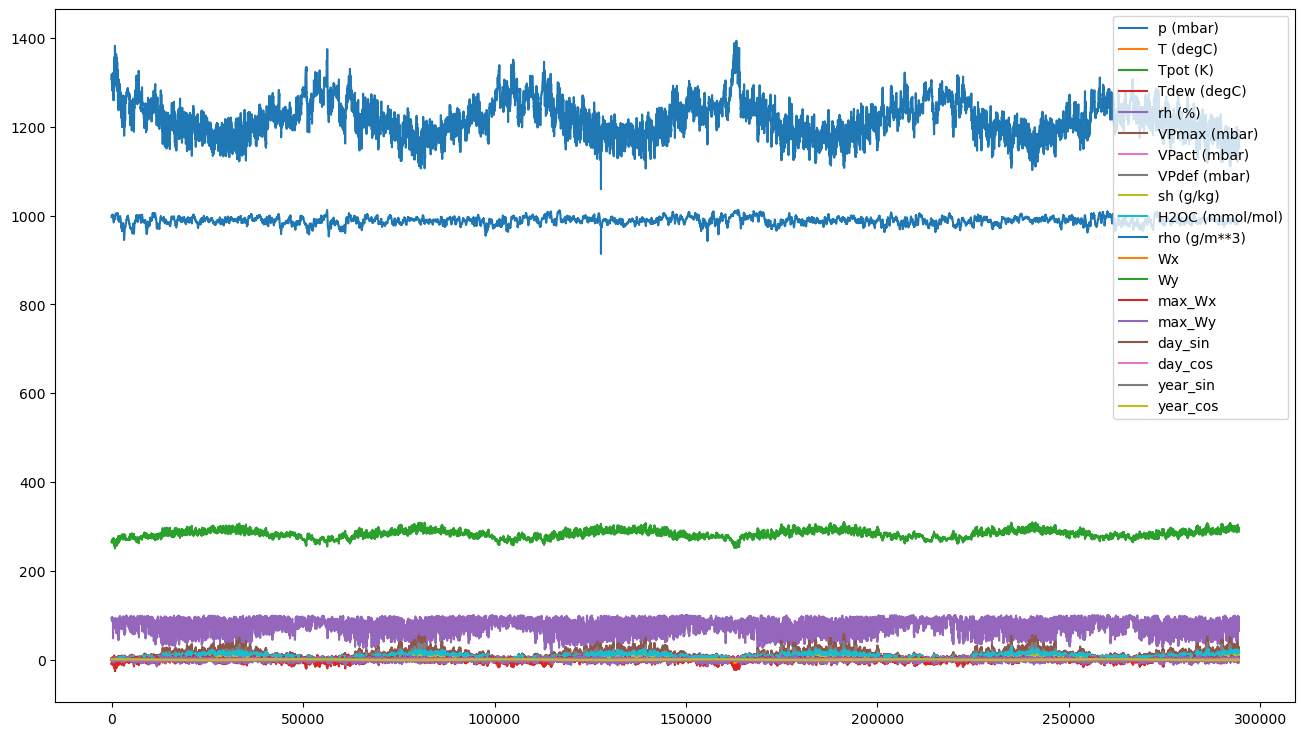

In [17]:
#plot the datas
train_df.plot()
plt.show()

# Normalize Data
1. It is important to scale features in modelling and Normalization is one of them
2. Just subtract the mean and divide by standart deviation
3. At this case, we are gonna only use mean and std of train set because models has no access to the test and validation set.

In [19]:
# get the mean and std of train data
mean = train_df.mean()
std = train_df.std()

#normalization using mean and standart deviation of train set
train_df = (train_df - mean) / std
val_df = (val_df - mean) / std
test_df = (test_df - mean) / std

# Let's Create models in 2 ways:
1. Single Step Models
2. Multiple Step Models

## Single Step Models
1. Baseline
2. linear Model
3. Dense
4. Multistep Dense
5. Convolutional Neural Network
6. Reccurent Neural Network
7. Performance
8. MultiOutput Models

## Baseline Model
Great starting when you start building models on the clean data. But it is not the 'great' model actually